# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 9


### Zadanie 1

1. Wczytaj plik `mieszkania.csv`, np. za pomocą:
    - biblioteki [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (`read_csv`),
    - biblioteki [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) (`genfromtxt`),
    - biblioteki [`csv`](https://docs.python.org/3/library/csv.html) (`reader`).
1. Usuń nieprawidłowe dane np. wiersz zawierający wartość `-` lub wartość $0$ powinien zostać usunięty.
1. Zamień wartości liczbowe w formacie tekstowym na typ liczbowy.
1. Wyświetl **funkcję masy prawdopodobieństwa** wartości mieszkania dla różnych rodzajów "transakcji rynkowych". Podpowiedź: możesz skożystać z funkcji `displot` z modułu `seaborn` (jeżeli nie posiadasz to możesz zainstalować za pomocą `pip install seaborn`).
1. Wyświetl wszystkie trzy powyższe funkcje (dla ogółu, rynku pierwotnego i wtórnego) na jednym wykresie.
1. Opisz wyniki.

_Informacja odnośnie zbioru danych:_

- _Prezentowane dane dotyczące wielkości sprzedaży oraz cen nieruchomości zostały pobrane z GUSu i opracowane na podstawie informacji pozyskanych z Rejestru Cen Nieruchomości (RCN) – do 31 lipca Rejestru Cen i Wartości Nieruchomości (RCiWN) –  prowadzonego przez starostwa powiatowe i prezydentów miast na prawach powiatu przy wykorzystaniu informacji pochodzących z aktów notarialnych. Obserwacji podlegają tylko te transakcje kupna/sprzedaży nieruchomości, które zostały zawarte w trakcie badanego okresu oraz zostały zarejestrowane w RCN przed datą przekazania wyciągu z rejestru do Głównego Urzędu Statystycznego. Prezentowane są dane dla lokali mieszkalnych znajdujących się w budynkach wielorodzinnych (potocznie mieszkania w blokach), bez informacji o domach jednorodzinnych._
- _Prezentowane dane dotyczą sprzedaży o charakterze rynkowym tj. sprzedaży na wolnym rynku (z pewnymi wyłączeniami, np. sprzedaży między stronami spokrewnionymi) oraz sprzedaży przetargowej. W przypadku braku odpowiedniej informacji w zbiorach pochodzących z RCN (do 31 lipca 2021 r. – RCiWN), podział na rynek pierwotny i wtórny został przeprowadzony przyjmując założenie, że sprzedaż na rynku pierwotnym dotyczy transakcji dokonywanych na wolnym rynku, gdzie stroną sprzedającą jest osoba prawna i średnia cena za 1 m2 powierzchni użytkowej lokalu wynosi co najmniej 2 000 zł. Do transakcji na rynku wtórnym zaliczono pozostałe transakcje rynkowe przeprowadzone na wolnym rynku oraz sprzedaż przetargową. W grudniu 2021 r. zasilono BDL danymi ostatecznymi za lata 2010-2014, które dotyczą większej liczby transakcji kupna-sprzedaży lokali mieszkalnych w porównaniu do danych wcześniej opublikowanych przez GUS. Od roku 2020 brak danych dla miasta Koszalin oraz niekompletne dane dla miasta Szczecin._
- _Mediana cen za 1 m2 lokali mieszkalnych sprzedanych w ramach transakcji rynkowych_
- _Data ostatniej aktualizacji:	16.12.2021_
- Przypisy:	
  - `-` oznacza brak informacji z powodu: zmiany poziomu prezentacji, zmian wprowadzonych do wykazu jednostek terytorialnych lub modyfikacji listy cech w danym okresie sprawozdawczym; 
  - `n` - Dana jeszcze niedostępna, będzie dostępna; 
  - `x` - Brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe; 
  - `X` - Zmiany metodologiczne, brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('mieszkania.csv', delimiter=';')

data_df = data_df[~(data_df == '0').any(axis=1)]
data_df = data_df[~(data_df == '-').any(axis=1)]
data_df = data_df.reset_index(drop=True)

data_df['Wartosc'] = pd.to_numeric(data_df['Wartosc'], errors='ignore')


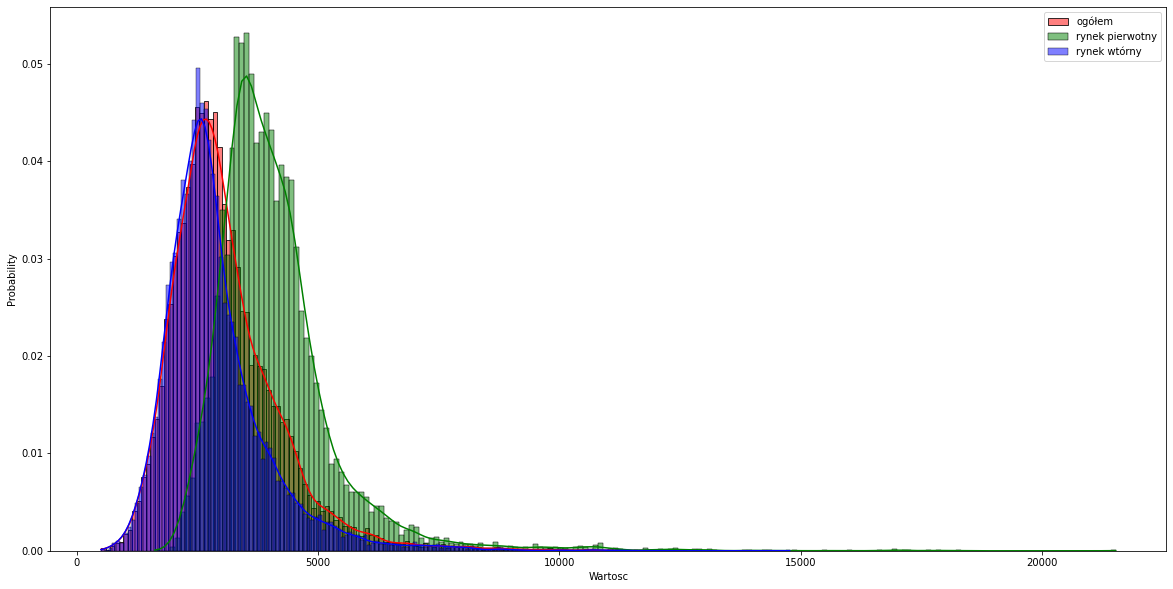

In [3]:
labels = []
values = []
fig, ax = plt.subplots(figsize=(20, 10))
for i, typ in enumerate(data_df['Transakcje rynkowe'].unique()):
    sns.histplot(data_df[data_df['Transakcje rynkowe'] == typ]['Wartosc'], ax=ax, color=('r', 'g', 'b')[i], label=typ, kde=True, stat='probability')

plt.legend()
plt.show()

Przy kupowaniu mieszkania na rynku pierwotnym jest większa szansa że mieszkanie będzie droższe niż na rynku wtórnym lub ogólnym rynku mieszkań

### Zadanie 2 (kontynuacja poprzedniego)
1. Wyświetl dystrybuantę (funkcja `ecdfplot`) wartości mieszkań dla rodzaju transakcji `ogólny`.
1. Odczytaj "na oko" z wykresu ile % mieszkań sprzedaje się za cenę poniżej 4 tys. zł.

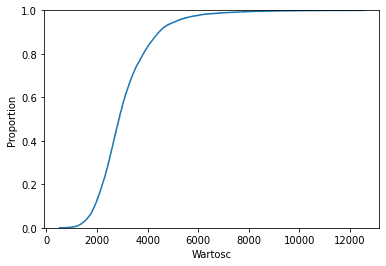

In [4]:
sns.ecdfplot(data_df[data_df['Transakcje rynkowe'] == 'ogółem']['Wartosc'])
plt.show()

Około 80% mieszkań sprzedaje się za mniej niż 4 tys zl za m2

### Zadanie 3

Opis zbioru danych znajduje się w pliku z danymi.

1. Wczytaj plik `boston.txt` (zwróć uwagę na format pliku), bez ręcznej edycji tego pliku.
> Podpowiedź: możesz użyć funkcji `read_csv` z parametrami `skiprows`, `header`, `sep`.
1. Wyświetl funkcję masy prawdopodobieństwa dla ceny mieszkań.
1. Wyświetl funkcję masy prawdopodobieństwa dla dwóch zmiennych (`x` i `y`): `MEDV`, `RM`. W jakiej cenie i liczbie pokoi sprzedaje się najwięcej mieszkań? Co jeszcze można odczytać z wykresu?
1. Sprawdź jeszcze jeden dowolny atrybut i opisz wyniki.


In [5]:
with open("boston.txt", "r") as file_pointer:
    lines = file_pointer.readlines()

In [6]:
import re

raw_data = []

for i in range(22, len(lines), 2):
    pre = re.split('\s+', lines[i].strip())
    post = re.split('\s+', lines[i+1].strip())
    raw_data.append(pre + post)

In [26]:
labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATI', 'B', 'LSTAT', 'MEDV']

In [27]:
boston_np = np.array(raw_data).astype(float)
boston_df = pd.DataFrame(boston_np, columns=labels)

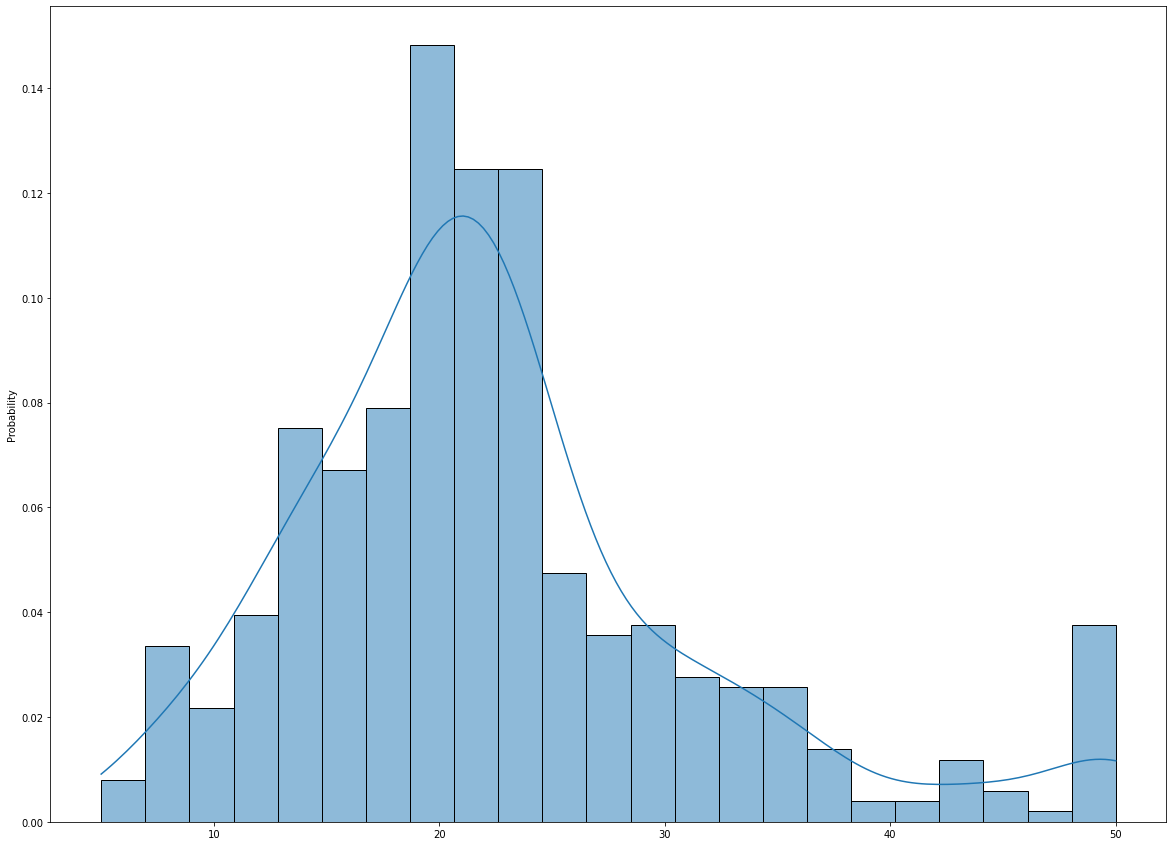

In [31]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.histplot(boston_np[:, -1], ax=ax, kde=True, stat='probability')
xt = np.arange(min(boston_np[:, -1]), max(boston_np[:, -1]), 10)
plt.show()

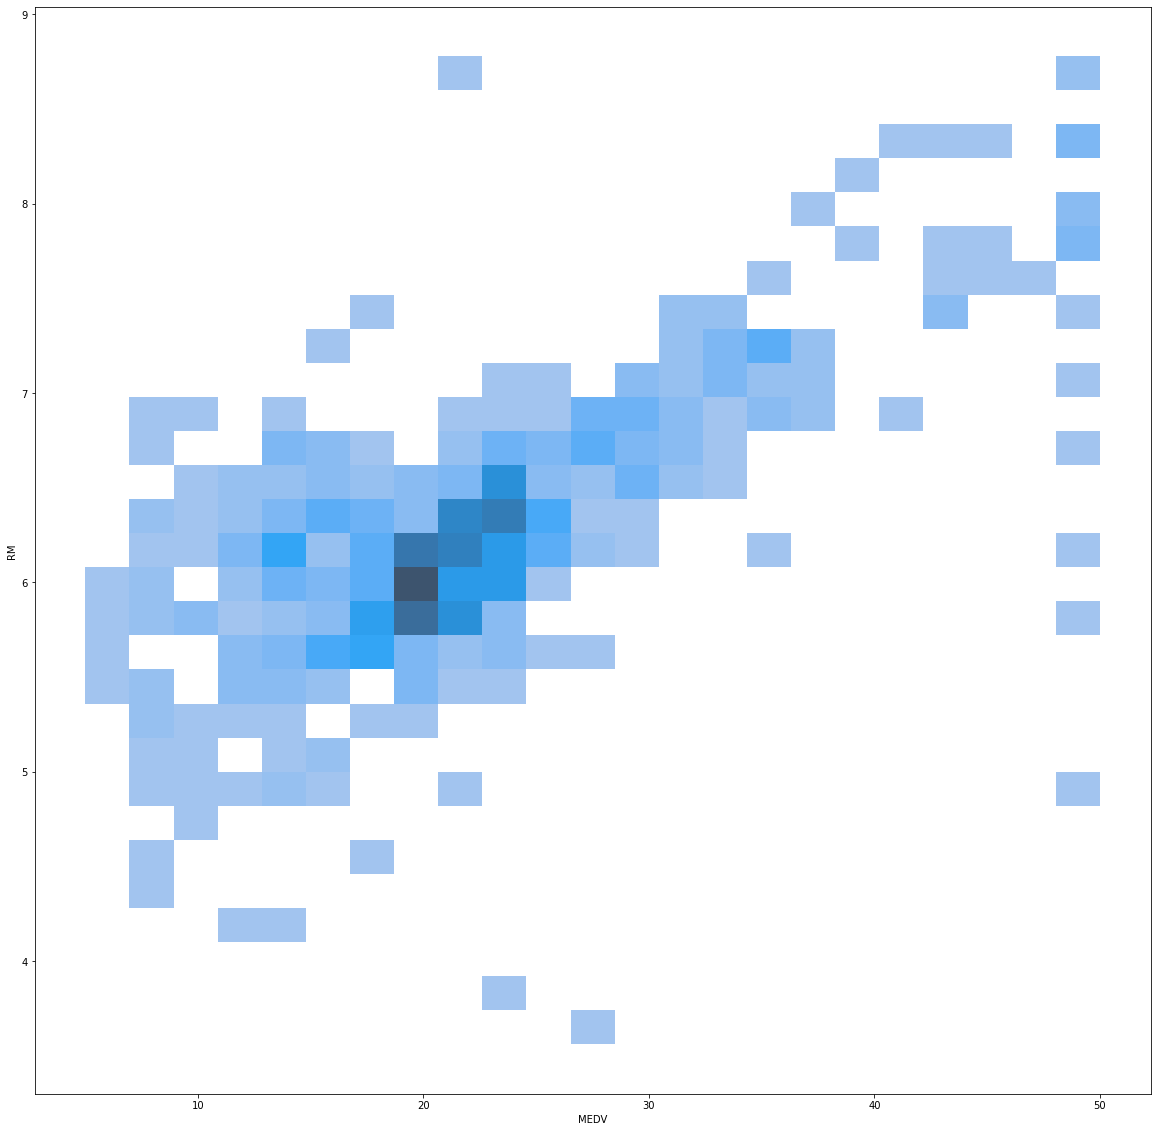

In [39]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.histplot(boston_df, x='MEDV', y='RM', stat='probability')
plt.show()

Najwięcej mieszkań sprzedaje się w kombinacji 6 pokoi w cenie 20k$

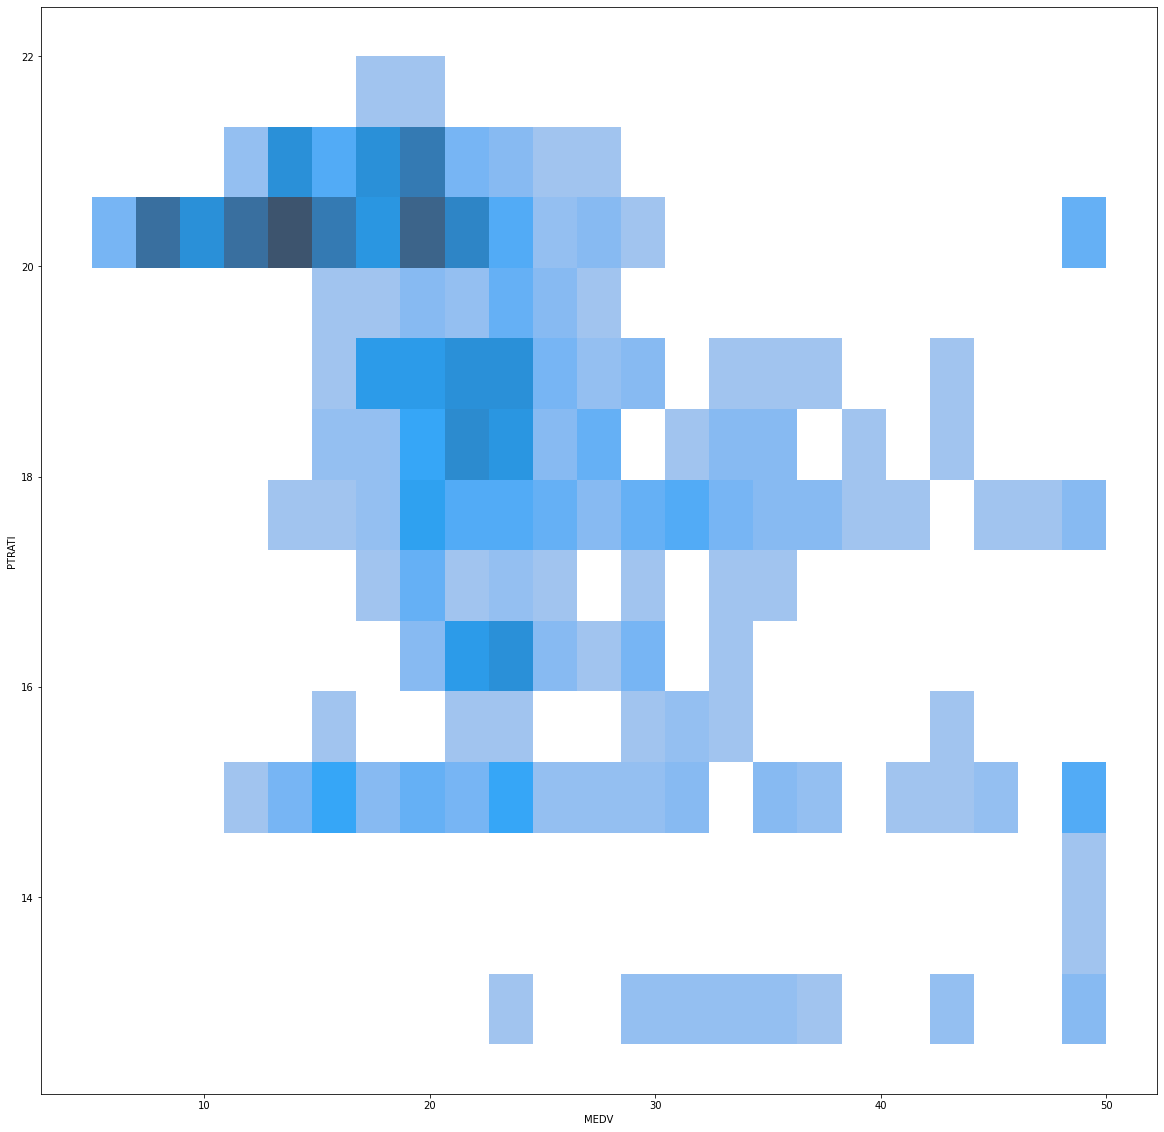

In [42]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.histplot(boston_df, x='MEDV', y='PTRATI', stat='probability')
plt.show()

W rejonach z większym stosunkiem nauczycieli do uczniów sprzedaje się więcej domów oraz większość z nich jest w niższych cenach. Oznacza to że ludzie chętniej kupują mieszkania w obszarach w których znajdują się szkoły.